In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("data.csv")

In [3]:
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

In [5]:
def rate(item):
    item=str(item).split('/')
    item=item[0]
    return float(item)
df['rate']=df['rate'].apply(rate)
print(df.head())
    
                         

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of resteraunt')

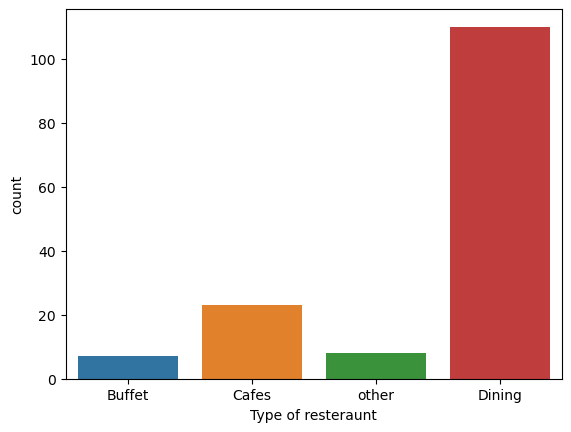

In [7]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of resteraunt")

Text(0, 0.5, 'votes')

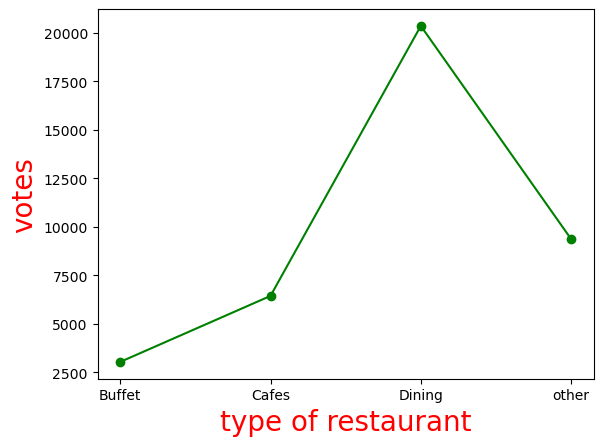

In [12]:
group=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of restaurant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

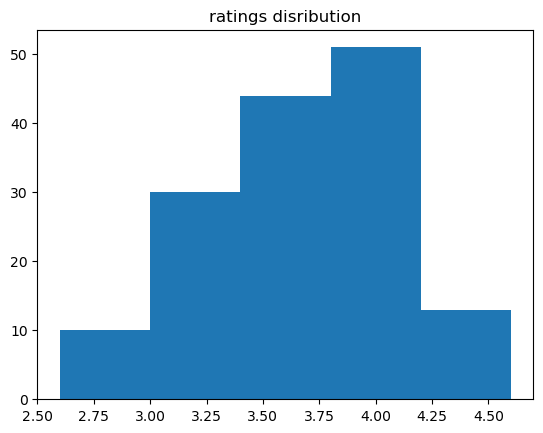

In [13]:
plt.hist(df['rate'],bins=5)
plt.title("ratings disribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

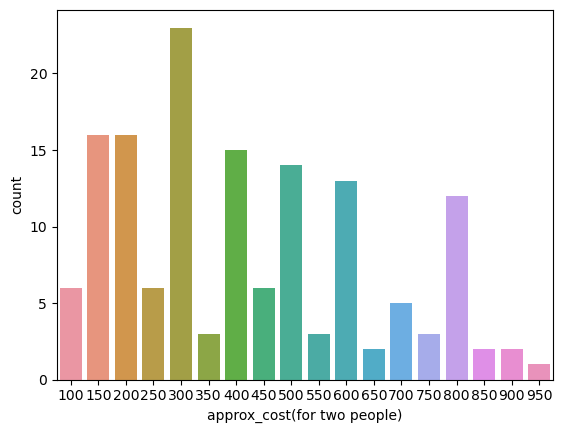

In [16]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

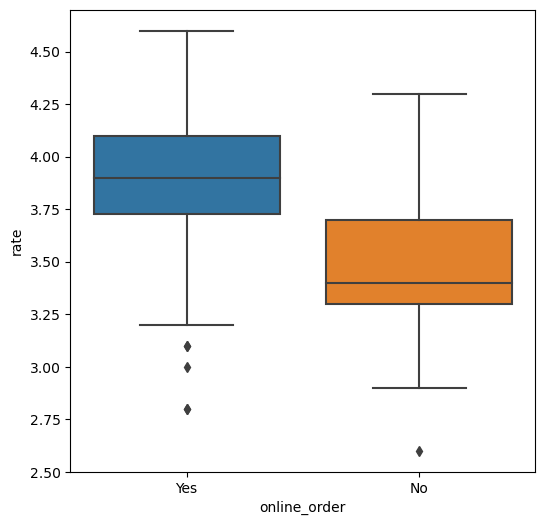

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

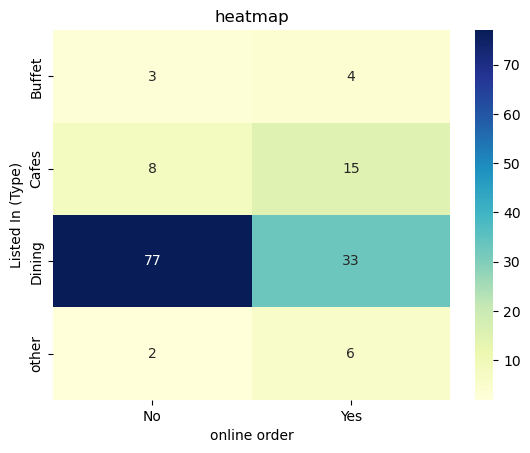

In [22]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In (Type)")
plt.show()